In [2]:

from pydoc import describe
from unicodedata import decimal
from pyextremes import EVA,get_extremes , __version__
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks
import pdb

In [3]:
def loadCsv(path):
    loader = pd.read_csv(path, index_col=0,delimiter=',', parse_dates=True).squeeze()
    return loader

def loadCsvNoInd(path):
    loader = pd.read_csv(path,delimiter=',', parse_dates=True).squeeze()
    return loader

In [49]:
# DATA FILES should be replaced with the name of the files that contain the data - Data files can be provided upon request. This is an example related to a publication
FILEname1 = 'zarco_data'
FILEname2='joao_data'
FilenNameext1 = '.csvextremes.csv'
FilenNameext2 ='.csvrelated2extrems.csv'
FilenNameext3 = '.csvreturnValues.csv'

FILE1 = FILEname1+FilenNameext1
FILE2 =FILEname1+FilenNameext2
FILE3 =FILEname2+FilenNameext1
FILE4=FILEname2+FilenNameext2
FILE5=FILEname1+FilenNameext3
FILE6=FILEname2+FilenNameext3
UPTOCOLUMN= 5
data1a = loadCsv(FILE1)
data1b=loadCsvNoInd(FILE2)
data1c =loadCsvNoInd(FILE5)
data2a = loadCsv(FILE3)
data2b=loadCsvNoInd(FILE4)
data2c =loadCsvNoInd(FILE6)
# print(data.head())
# print(data.describe())
print(data1b.info())
# data.dropna(inplace=True)
print(data1b.info())
print(data1b.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Humidity            70 non-null     float64
 1   Temperature         70 non-null     float64
 2   cloudcover          70 non-null     float64
 3   windspeedKmph       70 non-null     float64
 4   Solar w/m2          70 non-null     float64
 5   Diffuse Solar w/m2  70 non-null     float64
 6   Produzida           70 non-null     float64
 7   year                70 non-null     int64  
 8   month               70 non-null     int64  
 9   day                 70 non-null     int64  
 10  timestamp           70 non-null     object 
dtypes: float64(7), int64(3), object(1)
memory usage: 6.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  

In [5]:
print(data2a)

                time  count
year                       
2018-01-01  13:00:00      2
2018-01-01  14:00:00      2
2018-01-01  15:00:00      1
2018-01-01  16:00:00      4
2019-01-01  13:00:00     13
2019-01-01  14:00:00      2
2019-01-01  15:00:00      6
2019-01-01  16:00:00     11
2020-01-01  13:00:00      3
2020-01-01  14:00:00      3
2020-01-01  15:00:00      7
2020-01-01  16:00:00     15


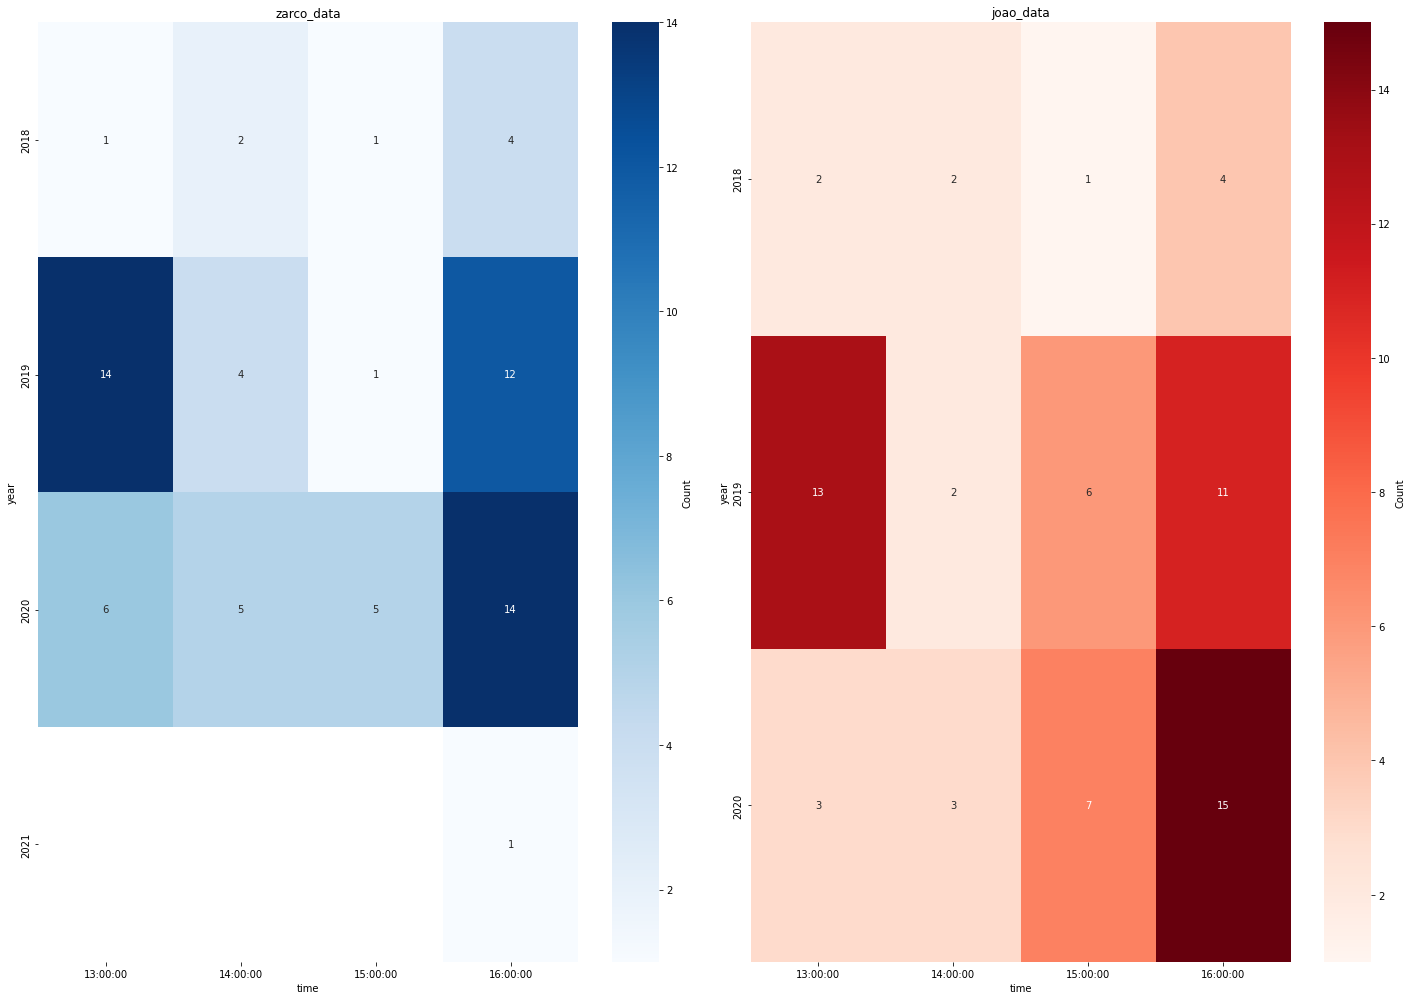

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are the two dataframes you're comparing

# Pivot tables to get years on the rows and times on the columns
pivot1 = data1a.pivot_table(index=data1a.index.year, columns='time', values='count')
pivot2 = data2a.pivot_table(index=data2a.index.year, columns='time', values='count')
# Set global font size
plt.rcParams.update({'font.size': 18})

# Create a figure with two subplots for comparison
plt.figure(figsize=(20, 14))

# Heatmap for the first dataset
plt.subplot(1, 2, 1)
sns.heatmap(pivot1, annot=True, cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(FILEname1)

# Heatmap for the second dataset
plt.subplot(1, 2, 2)
sns.heatmap(pivot2, annot=True, cmap='Reds', cbar_kws={'label': 'Count'})
plt.title(FILEname2)

plt.tight_layout()
plt.show()

In [7]:
# print(data1b.iloc[:,:-5].mean())
# print(data2b.iloc[:,:-5].mean())    

# print(data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean())
# Delta= data1b.iloc[:,:-5].mean()- data2b.iloc[:,:-5].mean()

In [67]:
# The Normalized calucations for related circumstances are as follows:
def Normalization(min,max,mean):
    return (mean-min)/(max-min)

Normalized1b = Normalization(data1b.iloc[:,:-UPTOCOLUMN].min(),data1b.iloc[:,:-UPTOCOLUMN].max(),data1b.iloc[:,:-UPTOCOLUMN].mean())
Normalized2b = Normalization(data2b.iloc[:,:-UPTOCOLUMN].min(),data2b.iloc[:,:-UPTOCOLUMN].max(),data2b.iloc[:,:-UPTOCOLUMN].mean())
print(data1b.iloc[:,:-5].mean())
print(data2b.iloc[:,:-5].mean())

print(Normalized1b)
print(Normalized2b)

Humidity               67.728571
Temperature            18.742857
cloudcover             55.457143
windspeedKmph          18.500000
Solar w/m2            368.734781
Diffuse Solar w/m2    241.513144
dtype: float64
Humidity               69.057971
Temperature            18.463768
cloudcover             58.202899
windspeedKmph          18.202899
Solar w/m2            367.013457
Diffuse Solar w/m2    221.890545
dtype: float64
Humidity              0.483587
Temperature           0.518681
cloudcover            0.554571
windspeedKmph         0.453125
Solar w/m2            0.334679
Diffuse Solar w/m2    0.503480
dtype: float64
Humidity              0.481159
Temperature           0.538647
cloudcover            0.582029
windspeedKmph         0.307044
Solar w/m2            0.340758
Diffuse Solar w/m2    0.487093
dtype: float64


In [84]:
def ProbabilityScale(data,dataforCount,TotalCases):
    # also to calculate historical occurences as E_c = \frac{N}{\sum_{k=1}^{m} N_k}
    Ec =dataforCount.count()[1]/TotalCases
    # print(Ec)
    T=[]
    x0=[]
    xlower=[]
    xupper=[]
    P = []
    Plower=[]
    Pupper=[]
    for i in range(len(data)):
        T.append(data['return period'][i])
        # P.append(1/data['return period'][i])
        x0.append(data['return value'][i])
        xlower.append(data['lower ci'][i])
        xupper.append(data['upper ci'][i])
        
        # Probability score is 1/return period * return value 0, lower and upper thus we have 3 Ps
        P.append(Ec*(1/T[i])*x0[i])
        Plower.append(Ec*(1/T[i])*xlower[i])
        Pupper.append(Ec*(1/T[i])*xupper[i])

        # Plower.append(1/data['return period'][i])*data['lower ci'][i]
        # Pupper.append(1/data['return period'][i])*data['upper ci'][i]

    return P,Plower,Pupper,T,x0,xlower,xupper
        # print(data[i:i+1])
# calc = data1c['return period']+data1c['return period']
# print(calc[0])

[0.7567876372135425, 0.2406286946135009, 0.06452919884998404, 0.028084706380202336, 0.010360431808984535, 0.0050813004272190635, 0.0025268248448889357, 0.0010084175577302714, 0.000503871169142627, 0.0002518599534860704]
[0.17554523014635268, 0.038741962175357046, 0.005256813715538846, 0.0011601527307834366, 0.00015741863459825292, 3.4741512385207334e-05, 7.667279581563453e-06, 1.0403567140575253e-06, 2.296015700996978e-07, 5.0671928461e-08]
[0.050479464018053144, 0.008595617647838054, -0.0009738107157587784, -0.011437626625744622, -0.008067717010752573, -0.0048529094085376714, -0.0026179958102851893, -0.0011031317586941065, -0.0005632570103112449, -0.0002857617348896172]


In [81]:



weights = [0.05, 0.1, 0.2,0.05,0.4,0.2]
# For the purposes of this should added AS constant
# benchmark accounts for ProbabilityScale, and weighted circumstances per o, lower, upper
def SumweightedCircumstances(weights,Normalized):
    # Sum of weighted circumstances is same but changes as per ProbabilityScale
    #data inclused sum of all circumstances
    count=-1

    s =[]
    for i in Normalized:
        # print(i)
        count = count+1
        # print(i*weights[count])
        s.append(i*weights[count])
    
    sumofValues = sum(s)


    return sumofValues #also scale2* and go for upper lower normal and per year



In [82]:
SumweightedCircumstances(weights,Normalized1b)

BenchmarkingScore = ProbabilityScale *SumweightedCircumstances(weights,Normalized1b)

0.44418564612930633

In [83]:
SumweightedCircumstances(weights,Normalized2b)


0.4434026469281645

In [95]:
TotalCases = data1b.count()[1]+data2b.count()[1]    

# print(Plower)
# print(P)
# print(Pupper)

def BenchmarkingScore(SumweightedCircumstances,Px,Pxlower,Pxupper):
    print(SumweightedCircumstances)
    ScoreInTimex= []
    ScoreInTimelower=[]
    ScoreInTimeUppder=[]
    for i in range(len(Px)):
        # print(P[i])
        ScoreInTimex.append(Px[i]*SumweightedCircumstances)
        ScoreInTimelower.append(Pxlower[i]*SumweightedCircumstances) 
        ScoreInTimeUppder.append(Pxupper[i]*SumweightedCircumstances)

    return ScoreInTimex,ScoreInTimelower,ScoreInTimeUppder




0.44418564612930633


In [125]:
P1,Plower1,Pupper1,T1,x01,xlower1,xupper1 =ProbabilityScale(data1c,data1b,TotalCases)
print(P1)
B1,Blower1,Bupper1 =BenchmarkingScore(SumweightedCircumstances(weights,Normalized1b),P1,Plower1,Pupper1)
print(B1)


[0.17554523014635268, 0.038741962175357046, 0.005256813715538846, 0.0011601527307834366, 0.00015741863459825292, 3.4741512385207334e-05, 7.667279581563453e-06, 1.0403567140575253e-06, 2.296015700996978e-07, 5.0671928461e-08]
0.44418564612930633
[0.07797467147747544, 0.017208623501178116, 0.0023350011968180217, 0.0005153231903317199, 6.992309792181816e-05, 1.5431681126332617e-05, 3.4056955349908e-06, 4.621115192386039e-07, 1.0198572176703749e-07, 2.2507743284067272e-08]


In [124]:

P2,Plower2,Pupper2,T2,x02,xlower2,xupper2 =ProbabilityScale(data2c,data2b,TotalCases)
print(P2)
B2,Blower2,Bupper2 =BenchmarkingScore(SumweightedCircumstances(weights,Normalized2b),P2,Plower2,Pupper2)
print(B2)

[0.5192787677509059, 0.16333036798847297, 0.03831285998410452, 0.013836246536290073, 0.0040419325916562655, 0.0017270753060563573, 0.0007791056694642116, 0.00028795505644078304, 0.0001393134410842377, 6.831677429631318e-05]
0.4434026469281645
[0.23024958011434724, 0.07242111748984006, 0.0169880235283401, 0.006135028337741666, 0.001792203609845604, 0.0007657897621496587, 0.00034545751607717104, 0.00012768003422219222, 6.177194852942189e-05, 3.0291838552579257e-05]


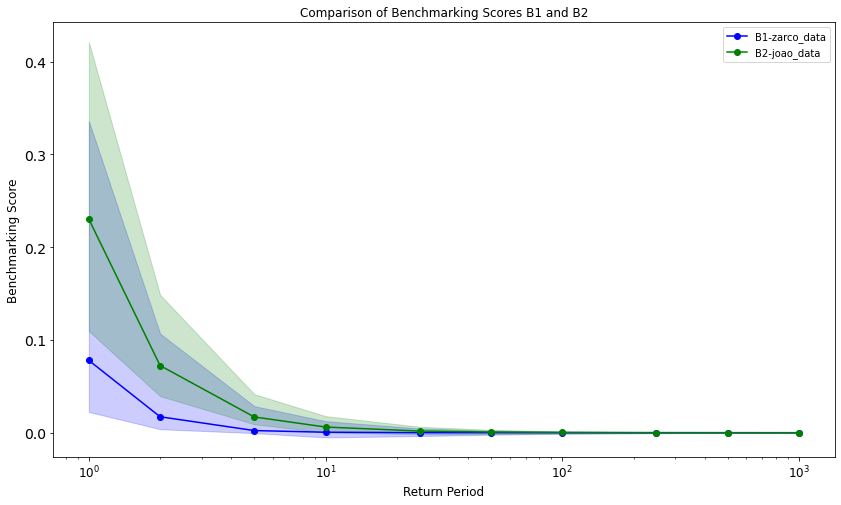

In [118]:
# Plotting B1 and B2 on the same plot
# check if return periods the same :
# For the case we compare 2 
def PlotCheck(T1,T2):
    if T1==T2:
        T= T1
        plt.figure(figsize=(14, 8))
        plt.plot(T, B1, marker='o', label='B1-zarco_data', color='blue')
        plt.plot(T, B2, marker='o', label='B2-joao_data', color='green')
        plt.fill_between(T, Blower1, Bupper1, color='blue', alpha=0.2)
        plt.fill_between(T, Blower2, Bupper2, color='green', alpha=0.2)
        plt.xticks(fontsize=12)
            
        plt.yticks(fontsize=14)

        plt.xlabel('Return Period', fontsize=12)
        plt.ylabel('Benchmarking Score',fontsize=12)
        plt.title('Comparison of Benchmarking Scores B1 and B2')
        plt.xscale('log')

        plt.legend()
        plt.show()
    else:
        return 'Return periods are not the same'
PlotCheck(T1,T2)



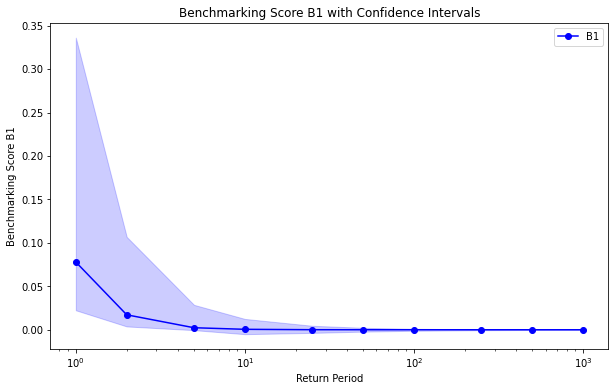

In [110]:
# Plotting B1 with its confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(T1, B1, marker='o', color='blue', label='B1')
plt.fill_between(T1, Blower1, Bupper1, color='blue', alpha=0.2)
plt.xlabel('Return Period')
plt.ylabel('Benchmarking Score B1')
plt.title('Benchmarking Score B1 with Confidence Intervals')
plt.xscale('log')
plt.legend()
plt.show()